# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [3]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.
athletes.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [7]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [8]:
athletes.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

In [9]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
# visualizando a função get_sample
get_sample

<function __main__.get_sample(df, col_name, n=100, seed=42)>

In [11]:
# Separando altura e peso com uma amostra de 3000 para cada um, será usado nas outras questões
altura = get_sample(athletes, 'height', n=3000, seed=42)
peso = get_sample(athletes, 'weight', n=3000)

In [12]:
def q1():
    # Teste de normalidade de Shapiro-Wik
    shapiro = sct.shapiro(altura)
    # Comparando a p-value com a significancia de 5%
    return shapiro[1]>0.05
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

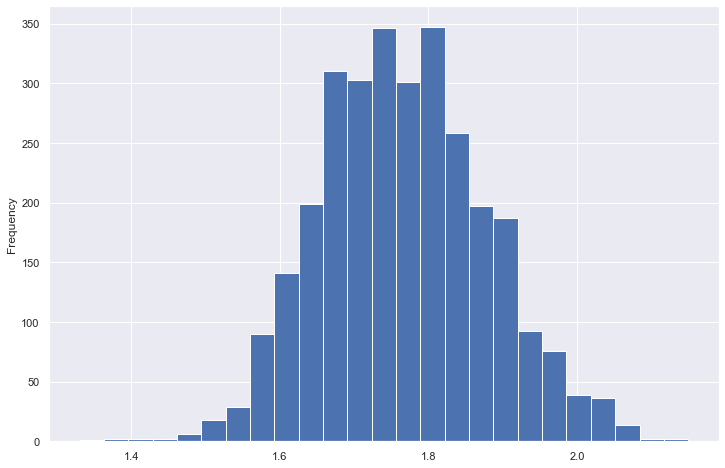

In [13]:
# Plot do histograma da variável altura
altura.plot(kind='hist', bins=25)
plt.show()

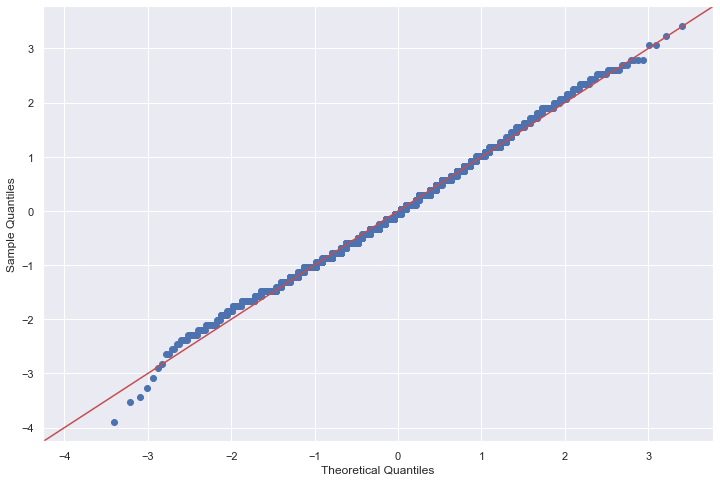

In [14]:
# qqplot
sm.qqplot(altura, fit=True, line='45')
plt.show()

### Refletindo 
* Tirando como uma primeira impressão o gráfico de histograma, a distribuição parace uma normal, porém ao fazer o teste de shapiro nos mostra o crontrário
* A hipótese nula,  𝐻0 , é a normalidade dos dados.
    *  Ja que o valor-p é menor que o nível de significância  𝛼 = 0.05, então temos evidências de que os dados não vêm de uma distribuição normal.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [27]:
def q2():
    # Teste de normlalidade de Jarque-Bera
    jarque = sct.jarque_bera(altura)
    # Comparando a p-value com a significancia de 5%
    return bool(jarque[1]>0.05)
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

* Assim como Shapiro-Wilk, o teste de Jarque-Bera é um teste de aderência à distribuição normal com  𝐻0  sendo a normalidade dos dados. A diferença reside na estatística de teste utilizada.
    * A estatistica tem como base a assimetrica e curtose, se a amostra vem de uma distribuição normal então esses valores são muito proximos de zero
    * Como o valor-P é menor que 𝛼 = 0.05, então temos evidências de que os dados não vêm de uma distribuição normal.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [28]:
def q3():
    # teste da normalidade de D'AgostinoPerson
    agostino = sct.normaltest(peso)
    return bool(agostino[1]>0.05)
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

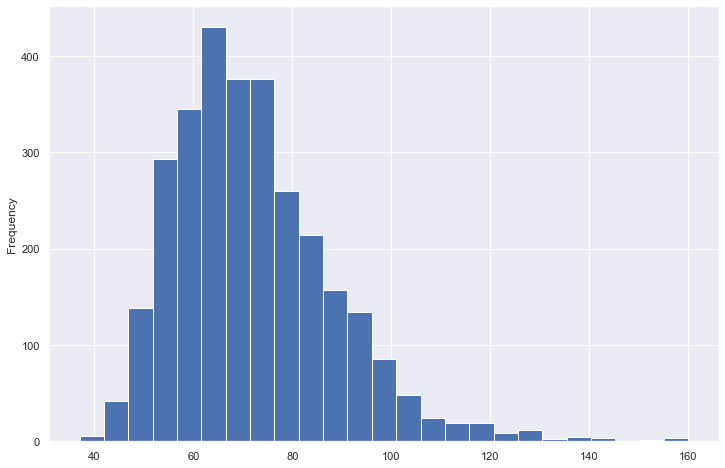

In [17]:
peso.plot(kind='hist',bins=25)
plt.show()

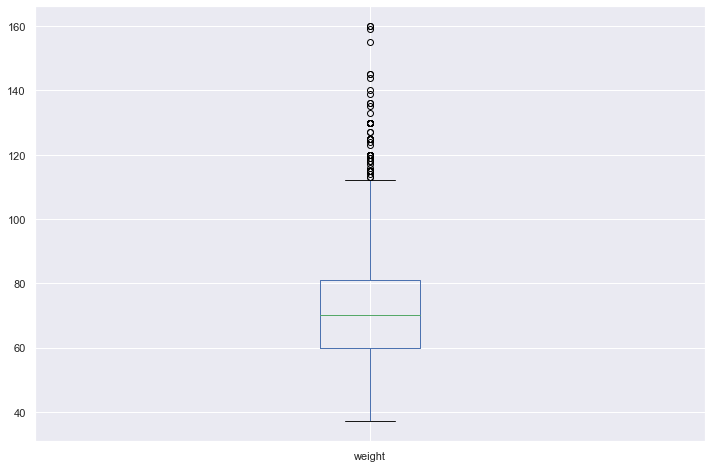

In [18]:
peso.plot(kind='box')
plt.show()

### Refletindo
* Sim, já que o gráfico não nos mostra uma distribuição normal, tão como o teste de D'Agostino não nos mostra uma distribuição normal
* Esse tipo de distribuição é denominada assimétrica positiva ou à direita

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [29]:
def q4():
    # realizando a transformação logatítmica na amostra 'peso' e fazendo a mesma análise da questao 3
    log_peso = np.log(peso)
    agostino_log = sct.normaltest(log_peso)
    return bool(agostino_log[1]>0.05)
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

In [20]:
# Variável
log_peso = np.log(peso)

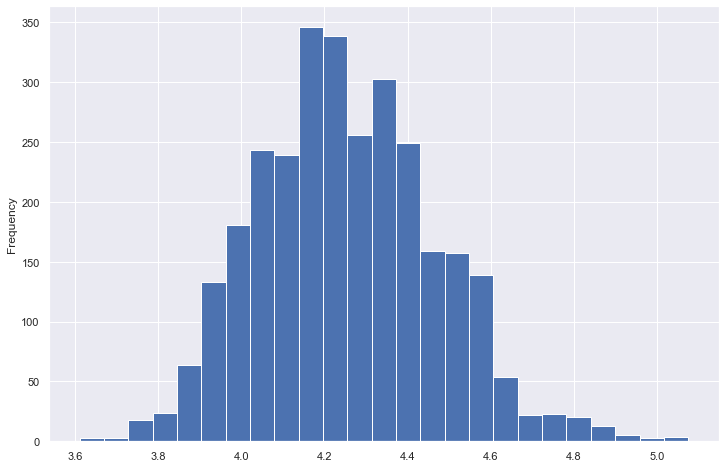

In [21]:
log_peso.plot(kind='hist',bins=25)
plt.show()

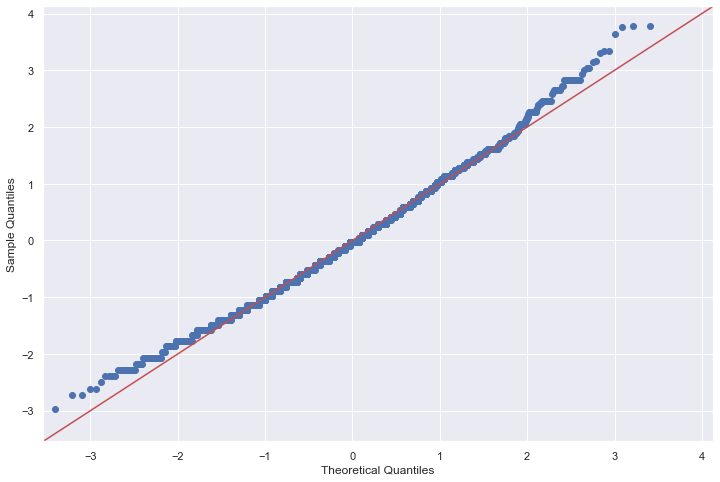

In [22]:
sm.qqplot(log_peso, fit=True, line='45')
plt.show()

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [23]:
# dataframes dos atletas brasileiros
bra = athletes[athletes['nationality']=='BRA']['height'].dropna()
usa = athletes[athletes['nationality']=='USA']['height'].dropna()
can = athletes[athletes['nationality']=='CAN']['height'].dropna()
#tamanho das amostras
len(bra), len(usa), len(can)

(476, 560, 320)

In [30]:
def q5():
    test_bra_usa = sct.ttest_ind(bra, usa, equal_var=False)
    return bool(test_bra_usa[1]>0.05) 
q5()

False

* Já que as amostras tem tamanho e variações diferentes o teste apropriado é o de Welch's test.
* Por isso o uso de equal_var=False, caso contrário ele faria o teste T-student.

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [31]:
def q6():
    test_bra_can = sct.ttest_ind(bra,can, equal_var=False)
    return bool(test_bra_can[1]>0.05)
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [32]:
def q7():
    test_usa_can = sct.ttest_ind(usa,can, equal_var=False)
    return float(round(test_usa_can[1], 8))
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
    * A probabilidade de encontrar uma diferença entre dois valores de média amostral é muito baixa, isso considerando a hipótese nula como verdadeira
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?